nama:haskarii aufa rafiki
nim:22.11.5313


In [1]:
# Import library yang diperlukan
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [2]:
# Membaca dataset dari file
file_path = 'diabetes.csv'  # Nama file yang diunggah
data = pd.read_csv(file_path)

# Menampilkan informasi awal dataset
print("Preview dataset:")
print(data.head())
print("\nInformasi dataset:")
print(data.info())


Preview dataset:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  

Informasi dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64

In [3]:
# Mengganti nilai nol dengan median pada kolom tertentu
columns_with_zero = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
for column in columns_with_zero:
    data[column].replace(0, data[column].median(), inplace=True)

# Menampilkan ringkasan setelah preprocessing
print("\nCek nilai nol setelah preprocessing:")
print((data[columns_with_zero] == 0).sum())



Cek nilai nol setelah preprocessing:
Glucose          0
BloodPressure    0
SkinThickness    0
Insulin          0
BMI              0
dtype: int64


<ipython-input-3-b0036ddef3f3>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[column].replace(0, data[column].median(), inplace=True)


In [4]:
# Set visualisasi yang lebih baik
sns.set(style="whitegrid")

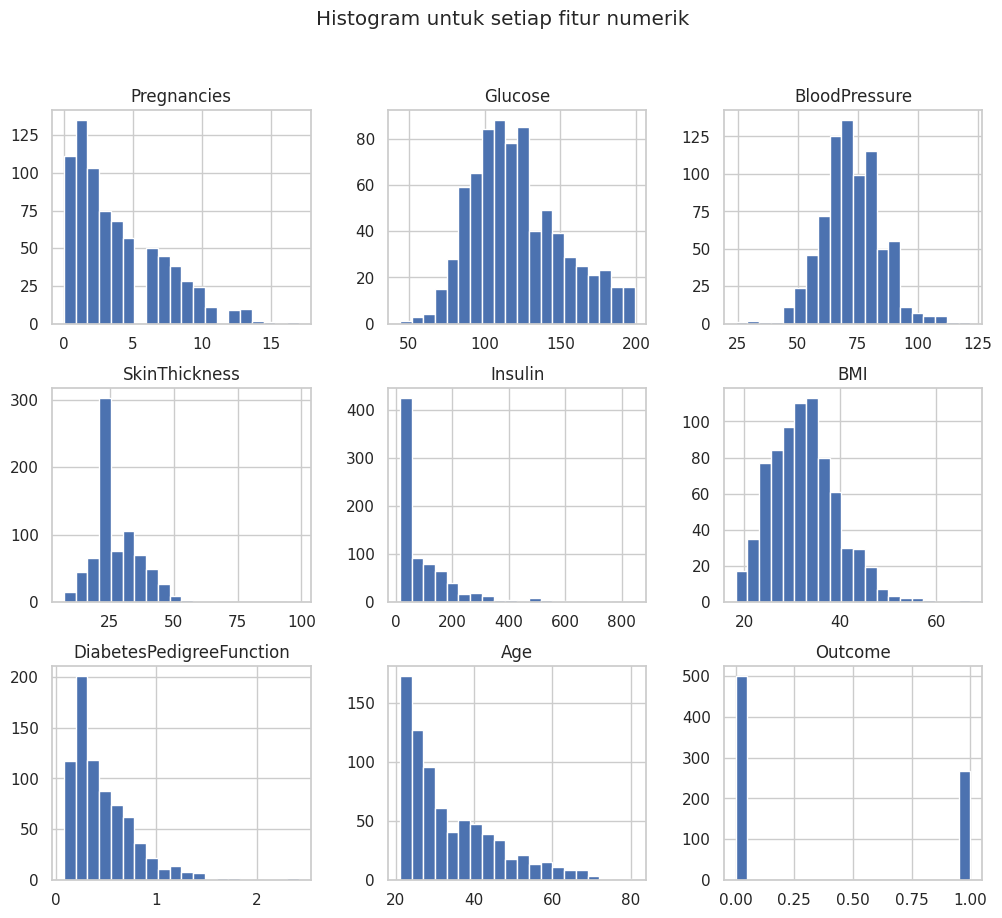

In [5]:
# Histogram untuk setiap fitur numerik
data.hist(figsize=(12, 10), bins=20)
plt.suptitle('Histogram untuk setiap fitur numerik')
plt.show()

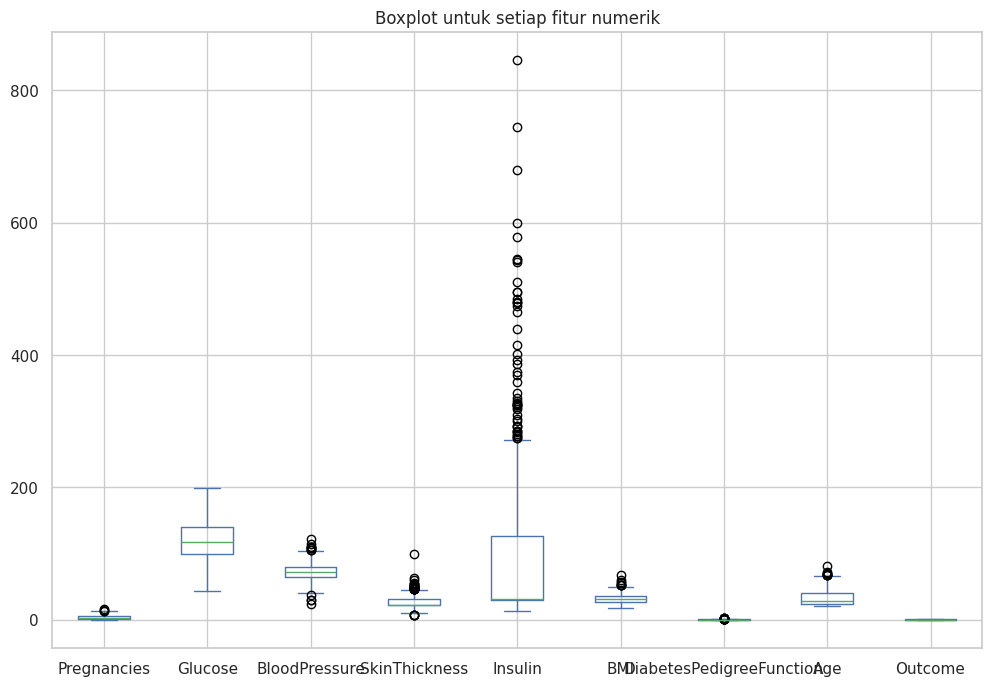

In [7]:
# Boxplot untuk setiap fitur numerik
fig, ax = plt.subplots(figsize=(12, 8))
data.plot(kind='box', ax=ax)
plt.title('Boxplot untuk setiap fitur numerik')
plt.show()

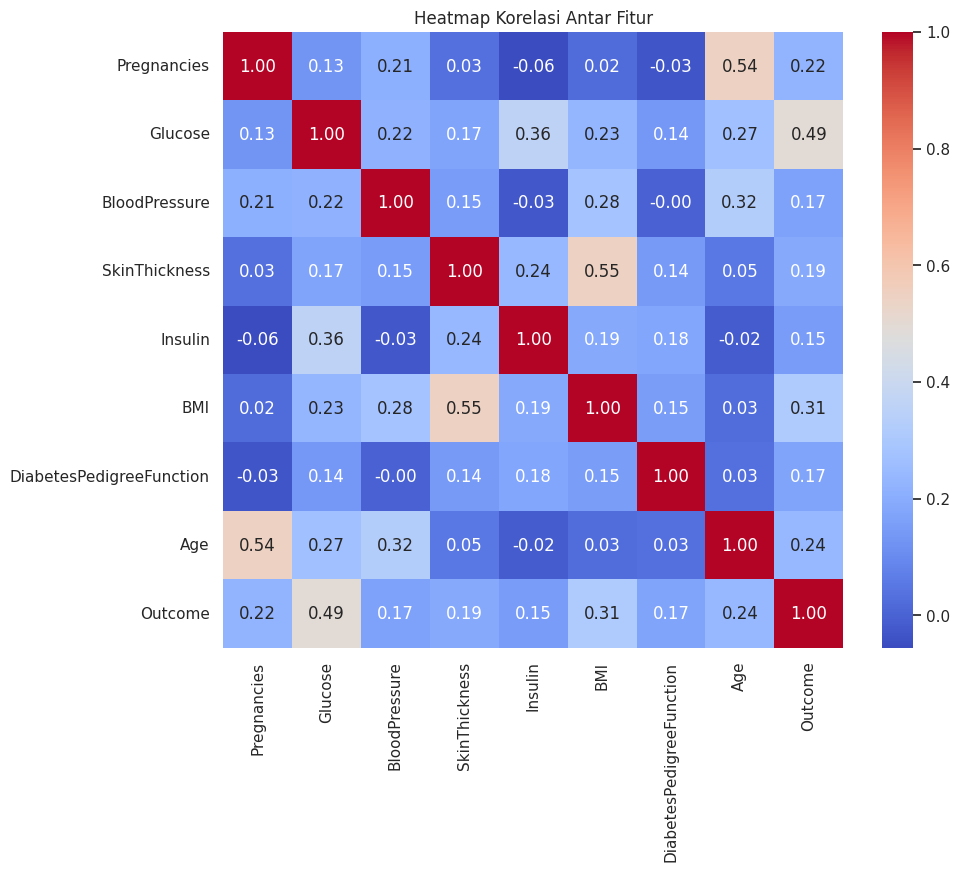

In [8]:
# Korelasi antar fitur
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title('Heatmap Korelasi Antar Fitur')
plt.show()

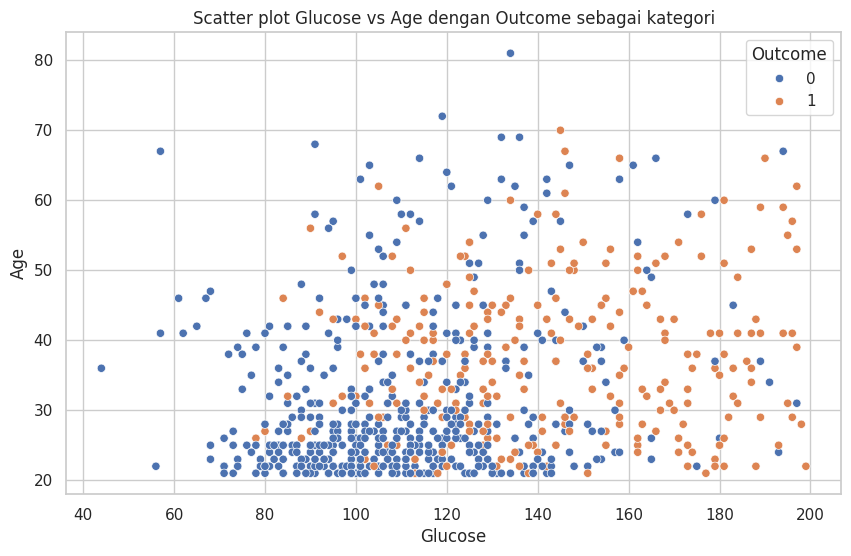

In [9]:
# Scatter plot untuk membandingkan Glucose dan Outcome
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Glucose', y='Age', hue='Outcome', data=data)
plt.title('Scatter plot Glucose vs Age dengan Outcome sebagai kategori')
plt.show()

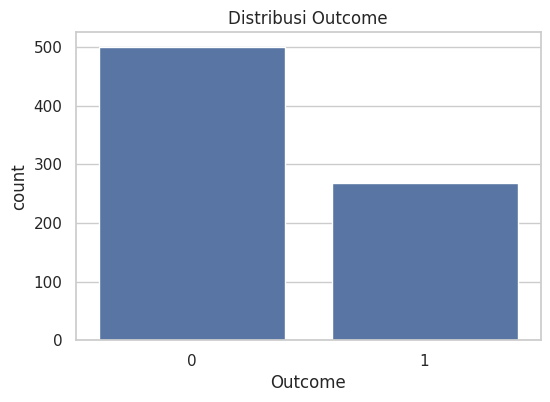

In [10]:
# Distribusi target
plt.figure(figsize=(6, 4))
sns.countplot(x='Outcome', data=data)
plt.title('Distribusi Outcome')
plt.show()

In [11]:
# Memisahkan fitur (X) dan target (y)
X = data.drop('Outcome', axis=1)  # Fitur
y = data['Outcome']  # Target

# Membagi dataset menjadi training dan testing set (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("\nJumlah data pada training set:", len(X_train))
print("Jumlah data pada testing set:", len(X_test))



Jumlah data pada training set: 537
Jumlah data pada testing set: 231


In [12]:
# Standarisasi fitur numerik
scaler = StandardScaler()

# Standarisasi data training dan testing
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print("\nStandarisasi selesai.")



Standarisasi selesai.


In [13]:
# Membangun model AdaBoost
model = AdaBoostClassifier(n_estimators=50, random_state=42)

# Melatih model dengan data training
model.fit(X_train, y_train)

print("\nModel AdaBoost selesai dilatih.")



Model AdaBoost selesai dilatih.


In [14]:
# Melakukan prediksi pada data testing
y_pred = model.predict(X_test)

print("\nPrediksi selesai.")



Prediksi selesai.


In [15]:
# Evaluasi model
accuracy = accuracy_score(y_test, y_pred)
classification = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Menampilkan hasil evaluasi
print(f"\nAccuracy: {accuracy * 100:.2f}%")
print("\nClassification Report:")
print(classification)
print("\nConfusion Matrix:")
print(conf_matrix)



Accuracy: 75.76%

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.82      0.82       151
           1       0.65      0.64      0.65        80

    accuracy                           0.76       231
   macro avg       0.73      0.73      0.73       231
weighted avg       0.76      0.76      0.76       231


Confusion Matrix:
[[124  27]
 [ 29  51]]
